# Customer Churn rate

##### Context

Predict behaviour to retain customers. You can analyze all relevant customer data and develop focused customer retention program.

Customer churn refers to the loss of customers or subscribers of a product or service for any reason at all. This metric is usually tracked monthly and reported at the end of the month.

Data Source: [Kaggle]('https://www.kaggle.com/datasets/blastchar/telco-customer-churn')

##### The dataset includes information about:

* **Churn**: Customes who left within the last month 
* **Services that each customer has signed up for**
    Phone, muliplelines, inene, online secuiy, online backup, device protection, tech support, and streaming TV and movies*
* **Customer account information**
    how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* **Demographic info about customers**
    *gender*, *age range*, and if they have partners and dependents

#### Why do customers churn

Customers churn for a number of different reasons. Business tend to focus on voluntary churn where subscripers intentionally chose to leave

### Columns in the Dataset

    customerID 
    gender 
    SeniorCitizen 
    Partner
    Dependents
    tenure 
    PhoneService 
    MultipleLines 
    InternetService
    OnlineSecurity
    OnlineBackup 
    DeviceProtection
    TechSupport
    treamingTV 
    StreamingMovies 
    Contract 
    PaperlessBilling
    PaymentMethod'
    MonthlyCharges 
    TotalCharges 
    Churn

**The raw data contains 7043 rows (customers) and 21 columns (features)**

### Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Customer_churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### The TotalCharges above is an object.... It needs a type conversion to the appropriate datatype

In [4]:
count = 0
for item in data.TotalCharges:
    if item == ' ':
        count +=1
print('The string values :', count)

The string values : 11


In [5]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.shape

(7043, 21)

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Checking for null values

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Removing Null value and filling them with the mean value

In [10]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [11]:
data['TotalCharges'].isnull().sum()

0

#### Checking for the categorical variables in the dataset

In [12]:
cat_var = data.select_dtypes(include = ['object']).keys()
print(len(cat_var))

17


In [13]:
num_var = list(data.select_dtypes(include = ['int64', 'float64']).keys())
print(num_var)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


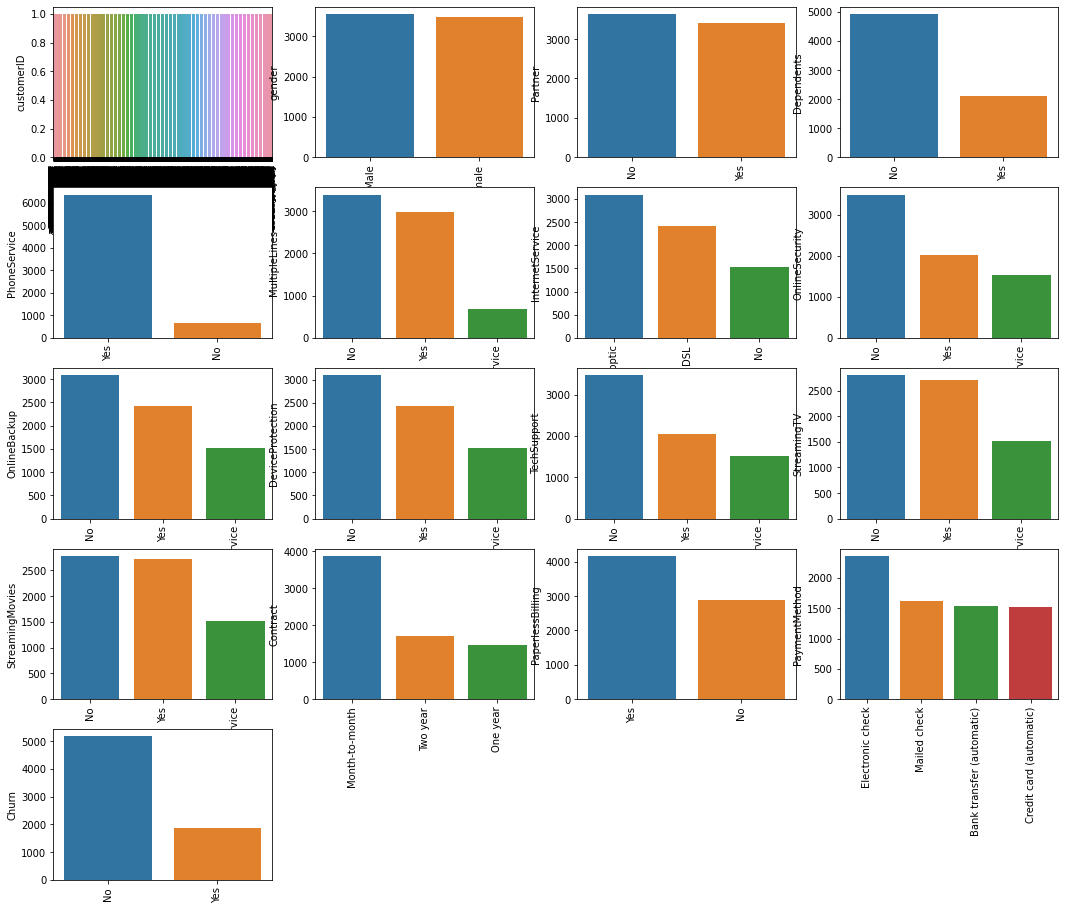

In [14]:
#visualizing all the unique values in columns using barplot to show the value which the max number of occurence in our dataset
cat_var = (data.dtypes == 'object' )
object_cols = list(cat_var[cat_var].index)
plt.figure(figsize = (18, 36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation = 90)
    sns.barplot(x = list(y.index), y = y)
    index +=1

In [14]:
##Data Manipulation
#Extract the 5th column, and store it in 'Dependants'
Dependants = data.iloc[:,4]
Dependants.head(5)


0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [15]:
#Another method to extract
d = data.loc[:,['Dependents']]
d.head(5)

,Dependents
0,No
1,No
2,No
3,No
4,No


In [16]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [17]:
cat_var

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [18]:
#Find the value_counts of the categorical columns
for i in cat_var:
    print(data[i].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: in

In [19]:
data['OnlineBackup'] = data['OnlineBackup'].replace('No internet service', 'No')
data['StreamingTV'] = data['StreamingTV'].replace('No internet service', 'No')
data['DeviceProtection'] = data['DeviceProtection'].replace('No internet service', 'No')
data['TechSupport'] = data['TechSupport'].replace('No internet service', 'No')
data['OnlineSecurity'] = data['OnlineSecurity'].replace('No internet service', 'No')
data['StreamingMovies'] = data['StreamingMovies'].replace('No internet service', 'No')
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')


In [20]:
data['OnlineBackup'].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

In [21]:
##Extract all the male senior citizens whose payment method is Electroci check & store
##the result in 'senior_male_electronic'
senior_male_electronic= data[(data['gender'] == "Male") & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == "Electronic check")]
senior_male_electronic.head(5)
senior_male_electronic.shape

(298, 21)

In [22]:
##Extract all those customers whose tenures are greater than 70 months or their monthly 
##charges are more than $100 & store the result in 'customer_total_tenure'
customer_total_tenure = data[(data['tenure'] > 70) | (data['MonthlyCharges'] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [23]:
##Extract all the cusomers whose contract is of two years, payment method is Mailed check & the value
#churn is 'yes' and store the result in 'two_mail_yes'

two_mail_yes = data[(data['Contract'] == 'Two year' ) & (data['PaymentMethod'] == "Mailed check") & (data['Churn'] == 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No,...,No,No,No,No,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


<AxesSubplot: >

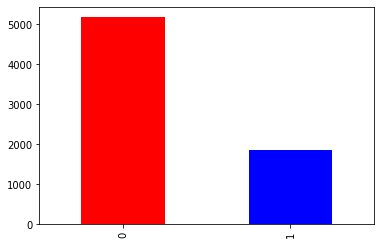

In [91]:
##Get the count of different levels from the churn column
colors = ['red', 'blue']
dl = data['Churn'].value_counts().plot(kind = 'bar', color = colors)
dl

In [25]:
##Build a barplot for the 'InternetService'
## i. Set x-axis label to 'Categories of Internet Service'
## ii. Set y-axis label to 'Count of Categories'
### iii. Set the title of plot to the 'Distribution of INternet Service'
### ix. Set the color of the bars to be 'orange'

In [26]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [27]:
%matplotlib inline

In [28]:
x = data['InternetService'].value_counts().keys().tolist()##keys()helps to extract the key values in a column
y = data['InternetService'].value_counts().tolist()

Text(0.5, 1.0, 'Distribution of Internet Service')

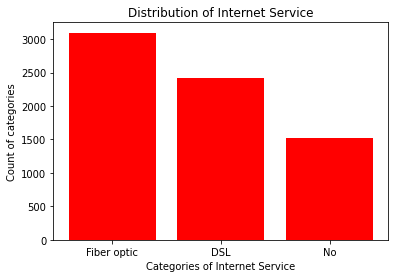

In [29]:
plt.bar(x,y, color = 'r')
plt.xlabel('Categories of Internet Service')
plt.ylabel("Count of categories")
plt.title('Distribution of Internet Service')

In [30]:
##Build a histogram for the 'tenure' column:
# i. Set the number of bins to be 30
## ii. Set the color of the bins to be 'green'
## iii. Assign the title 'Distribution of tenure'

Text(0.5, 1.0, 'Distribution of tenure')

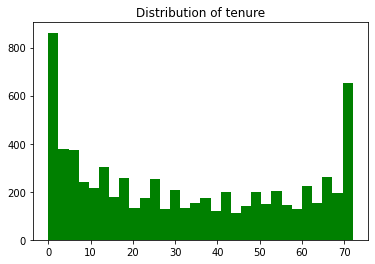

In [31]:
plt.hist(data['tenure'], bins = 30, color = 'green')
plt.title('Distribution of tenure')

In [32]:
## Build a scatterplot between 'MOnthlyCharges' & 'tenure'
# Map 'MonthlyCharges' to the y-axis & 'tenure'to the x-axis
# i. Assign the points a color of 'brown'
# ii. Set the x-axis label to 'Tenure of customer'
# iii. Set the y-axis label to 'Monthly Charges of customer'
# iv. Set the title to 'Tenure' vs Monthly charges.



Text(0.5, 1.0, 'Tenure vs Monthly Charges')

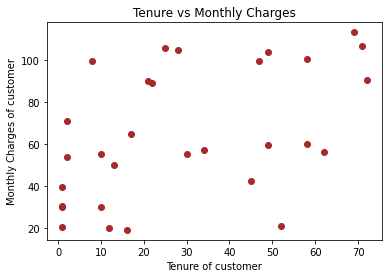

In [33]:
plt.scatter(data['tenure'].head(30), data['MonthlyCharges'].head(30), color = 'brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

In [34]:
# Build a box-plot between 'tenure' & "Contract" 
# Map 'tenure' on the y-axis & 'Contract' on the x-axis

<AxesSubplot: title={'center': 'tenure'}, xlabel='[Contract]'>

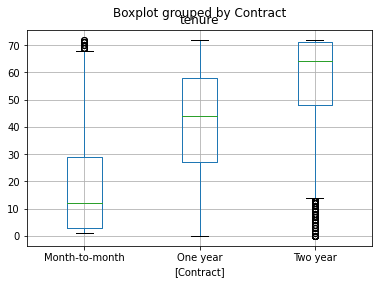

In [35]:
data.boxplot(column = 'tenure', by = ['Contract'])

In [36]:
data.head(2)
x = data['gender'].value_counts()
print(x)

Male      3555
Female    3488
Name: gender, dtype: int64


Text(0.5, 1.0, 'Distribution of Gender')

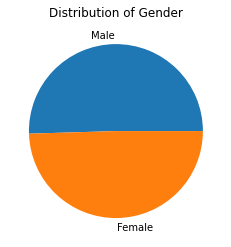

In [37]:

label = ['Male', 'Female']
plt.pie(x, labels = label )
plt.title('Distribution of Gender')

In [38]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [39]:
#find the number of partners and non partners we have
x = data['Partner'].value_counts()
print (x)

No     3641
Yes    3402
Name: Partner, dtype: int64


#### The details of males that are partners and females that are partners

In [40]:
#Male Partners
bys = data[(data['gender'] == 'Male') & (data['Partner'] == 'Yes')]
bys.head(2)
print('We have ', bys.shape[0], 'male partners')

We have  1714 male partners


#### Details of Female partners

In [41]:
#details of female partners
bys_fem = data[(data['gender'] == 'Female') & (data['Partner'] == 'Yes')]
bys_fem.head(2)
print('We have', bys_fem.shape[0], 'female partners')

We have 1688 female partners


In [42]:
#how many of our customers have a tenure above 2
data.head(3)
duration = data[(data['tenure'] > 2)]
print('We have', duration.shape[0], 'whose tenure are above', 2)

We have 6181 whose tenure are above 2


In [43]:
data.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [44]:
##Find out how many senior citizens we have 
citizen = data[(data['SeniorCitizen'] == 1)]
citizen
print('We have', citizen.shape[0], 'Senior Citizens')

We have 1142 Senior Citizens


In [45]:
##HOw many SeniorCitizens have tenure greater than 10
senor_cit = citizen[(citizen['gender'] == 'Male')  & (citizen['tenure'] > 10) ]
senor_cit
print('We have', senor_cit.shape[0], 'Senior Citizens')

We have 432 Senior Citizens


### Here: We want to elevate some of our customers who are not partners, neither seniorcitizens but have a tenure greater than 10 and whose monthly charges are greater than 50

### This is to know the Churn rate and better provide good services and retain them

In [46]:
#Find customers who are not partners, 
#not seniorcitizens
#whose tenure is greater than 10
#with monthly charges greater than 50

In [47]:
bric = data[(data['Partner'] == 'No') & (data['SeniorCitizen'] == 0) & (data['tenure'] > 10) & (data['MonthlyCharges'] > 50)]
bric

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No


In [48]:
print('We have', bric.shape[0], 'non partners, non senior citizens with tenure greater than', 10, 'and monthlycharges greater than', 50)

We have 1177 non partners, non senior citizens with tenure greater than 10 and monthlycharges greater than 50


In [49]:
bric['Churn'].value_counts()

No     895
Yes    282
Name: Churn, dtype: int64

<AxesSubplot: ylabel='Churn'>

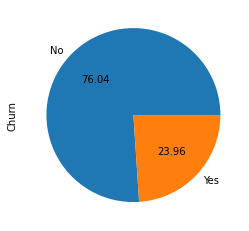

In [50]:
bric['Churn'].value_counts().plot(kind = 'pie', autopct = '%.2f')

From the chat above, most of ourr non partner customers enjoy our services. However we can do bettter reducing the monthly charges to retain bring back more customers by providing a partnership deal with more flexible charge rate.

<AxesSubplot: ylabel='Contract'>

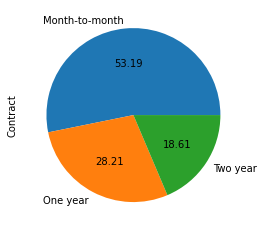

In [51]:
#The preferred contract mode of this group
bric['Contract'].value_counts().plot(kind = 'pie', autopct = '%.2f' )

In [52]:
bric['Contract'].value_counts()

Month-to-month    626
One year          332
Two year          219
Name: Contract, dtype: int64

In [53]:
#The most preferred PaymentMethod by this group 
bric['PaymentMethod'].value_counts()

Electronic check             426
Credit card (automatic)      301
Bank transfer (automatic)    275
Mailed check                 175
Name: PaymentMethod, dtype: int64

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

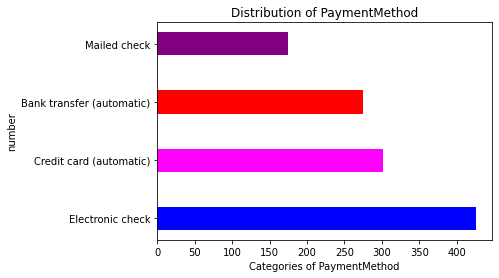

In [54]:
x = bric['PaymentMethod'].value_counts().keys().tolist()
y = bric['PaymentMethod'].value_counts().tolist()

color = ['blue', 'magenta', 'red', 'purple']
plt.barh(x, y, color = color, height = 0.4)
plt.ylabel('number')
plt.xlabel('Categories of PaymentMethod')
plt.title('Distribution of PaymentMethod')
plt.xticks()


In [55]:
for i in cat_var:
    data[i] = data[i].replace('Yes', 1)
    data[i] = data[i].replace('No', 0)

In [56]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [57]:
#Convert our gender into numerical variables for easy prediction

data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [59]:
data['InternetService'] = data['InternetService'].replace(0, 'No')

In [60]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [61]:
data.corr().shape

(17, 17)

In [62]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Contract'] = label.fit_transform(data['Contract'])
data['InternetService'] = label.fit_transform(data['InternetService'])
data['PaymentMethod'] = label.fit_transform(data['PaymentMethod'])

In [63]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.468689,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.412245,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.509692,-0.082255


<AxesSubplot: >

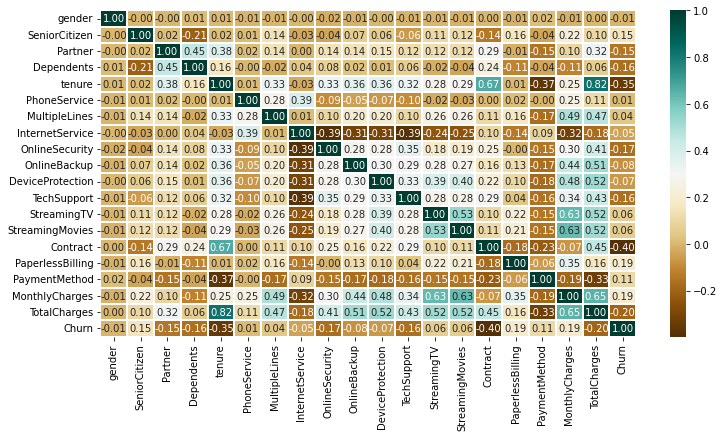

In [64]:
plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(),cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True,)

In [65]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,0,1,...,1,1,1,1,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,0,1,1,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,0,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [66]:
from sklearn.preprocessing import MinMaxScaler
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
data[cols] = scaler.fit_transform(data[cols])


In [67]:
#Getting our variables and target
x= data.drop(['customerID', 'Churn'], axis = 1)
y = data['Churn']

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [69]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

## PREDICTION WITH LOGISTICREGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)

In [71]:
print('B0: ', model.intercept_)
print('B1: ', model.coef_)

B0:  [-0.25947637]
B1:  [[-0.05303658  0.18936063  0.05960367 -0.19119221 -3.05970482 -1.1827128
   0.11407788 -0.01262884 -0.6099509  -0.32951717 -0.18433856 -0.53511331
  -0.08056209  0.01819804 -0.75527952  0.3650536   0.06215292  3.16264442
   1.22772284]]


In [72]:
test = [[0, 0, 1, 1, 0.152778, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0.112935, 0.037809]]
model.predict(test)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

##### Testing our prediction on the first 20 original label and the first 20 predicted label

In [73]:
#compute training accuracy
train_pred = model.predict(x_train)
print('first 20 prdicted: ', train_pred[:20])
print()
print('first 20 Original: ', y_train[:20].values)

first 20 prdicted:  [0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]

first 20 Original:  [0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [74]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test, y_pred) *100, 2), '%')

Accuracy score:  81.69 %


In [75]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.82


#### Cross validation

In [76]:
model = logreg.fit(x_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, x, y, cv = 5)

print('Mean model accuracy: ', scores.mean())

Mean model accuracy:  0.8029255919736759


### PREDICTION USING KNEIGHBOURCLASSIFIERS

In [77]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
model = knn.fit(x_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.76


In [78]:
#compute training accuracy
pred_train = model.predict(x_train)
print('first 20 prdicted: ', pred_train[:20])
print()
print('first 20 Original: ', y_train[:20].values)

first 20 prdicted:  [0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]

first 20 Original:  [0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [79]:
y_pred = model.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test, y_pred) *100, 2), '%')

Accuracy score:  75.94 %


### PREDICTION WITH SUPPORT VECTOR MACHINE

In [80]:
from sklearn.svm import SVC

svm = SVC()
model3 = svm.fit(x_train, y_train)

print('Accuracy of Support Vector Machine on training set: {:.2f}'
     .format(model3.score(x_train, y_train)))
print('Accuracy of Support Vector Machine on test set: {:.2f}'
     .format(model3.score(x_test, y_test)))

Accuracy of Support Vector Machine on training set: 0.81
Accuracy of Support Vector Machine on test set: 0.82


In [81]:
y_pred = model3.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test, y_pred) *100, 2), '%')

Accuracy score:  81.62 %


In [82]:
#compute training accuracy
pred_train = model3.predict(x_train)
print('first 20 prdicted: ', pred_train[:20])
print()
print('first 20 Original: ', y_train[:20].values)

first 20 prdicted:  [0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]

first 20 Original:  [0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


#### PREDICTION WITH DECISIONTREE CLASSIFIER

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model4 = dtc.fit(x_train, y_train)

print('Accuracy of Decision Tree Classifier on training set: {:.2f}'
     .format(model4.score(x_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'
     .format(model4.score(x_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set: 0.74


In [84]:
y_pred= model4.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test, y_pred) *100, 2), '%')

Accuracy score:  74.45 %


In [85]:
pred_train = model4.predict(x_train)
print('first 20 prdicted: ', pred_train[:50])
print()
print('first 20 Original: ', y_train[:50].values)

first 20 prdicted:  [0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1]

first 20 Original:  [0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1]


In [86]:
from sklearn import tree

text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_14 <= 0.50
|   |--- feature_17 <= 0.50
|   |   |--- feature_4 <= 0.05
|   |   |   |--- feature_7 <= 1.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- feature_17 <= 0.28
|   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |--- feature_17 <= 0.27
|   |   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_16 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_18 >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_16 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |

### Confusion matrix

In [87]:
#checking for performance matrix
from sklearn.metrics import confusion_matrix,classification_report

cm = classification_report(y_test, y_pred)
print('confusion matrix:\n', cm)

confusion matrix:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1036
           1       0.52      0.49      0.50       373

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

